In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split

In [16]:
dataset = pd.read_csv('../dataset/camera.csv')
dataset_labels = dataset['label']
dataset_X = dataset.drop('label',1)

In [17]:
dataset_X.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,590.000000,0.000000,1.000000,...,8.323848,0.0,0.0,4.456899,443.197258,121.885335,443.197258,14856.034960,0.0,0.0
2,1.956973,590.000000,5.820766e-11,1.973957,590.000000,0.000000,1.991242,590.000000,0.000000,1.999121,...,4.160671,0.0,0.0,5.456507,470.101420,123.932152,470.101420,15359.178351,0.0,0.0
3,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
4,1.988608,66.034372,3.599882e+01,1.993149,66.020623,35.999575,1.997711,66.006874,35.999953,1.999771,...,0.000000,0.0,0.0,1.000000,72.000000,0.000000,72.000000,0.000000,0.0,0.0


In [18]:
dataset_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141555 entries, 0 to 141554
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 124.2 MB


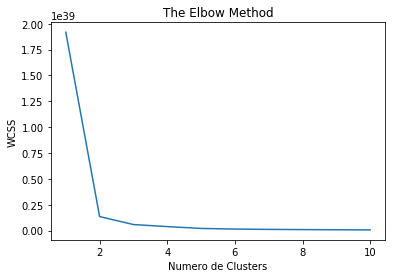

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(dataset_X)

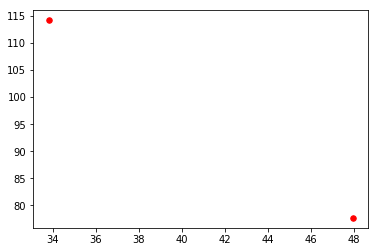

In [22]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'centros')
plt.show()

In [16]:
kmeans.cluster_centers_

array([[ 3.38114575e+01,  1.14183738e+02,  1.31183198e+04,
         5.08989923e+01,  1.14233475e+02,  1.37262872e+04,
         1.33092099e+02,  1.15534539e+02,  1.50856699e+04,
         7.62015451e+02,  1.19473369e+02,  1.75737872e+04,
         1.45196138e+03,  1.22004583e+02,  1.90885261e+04,
         3.38114575e+01,  1.14183738e+02,  1.31183198e+04,
         5.08989923e+01,  1.14233475e+02,  1.37262872e+04,
         1.33092099e+02,  1.15534539e+02,  1.50856699e+04,
         7.62015451e+02,  1.19473369e+02,  1.75737873e+04,
         1.45196143e+03,  1.22002650e+02,  1.90887451e+04,
         2.10975018e+01,  1.14670212e+02,  3.66062500e+01,
         1.73432580e+02,  3.79939301e+04, -2.22502097e+03,
        -5.77029612e-03,  3.17983001e+01,  1.14539718e+02,
         3.68692272e+01,  1.75282632e+02,  3.89684082e+04,
        -2.56915864e+03, -1.04912175e-02,  8.23236959e+01,
         1.15007091e+02,  3.95110128e+01,  1.75951707e+02,
         3.92633638e+04, -2.89784058e+03, -1.66507474e-0

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
kmeans.score(dataset_X)

-1.3558106817918255e+38

In [26]:
kmeans.inertia_

1.3558106817918112e+38

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import pairwise_distances
cm = confusion_matrix(dataset_labels, kmeans.labels_)
print("Matriz de confusão\n{}".format(cm))

Matriz de confusão
[[91422   133     0]
 [21619  3381     0]
 [24964    36     0]]
